In [1]:
import sys
import cv2
import matplotlib.pyplot as plt
# adding Folder_2 to the system path
sys.path.insert(0, '../src')

from ANNwithPatchMatch import getANNShiftmap
from ReconstructingTheImage import reconstruct
from ConstructingTextures import constructingTextures
from pyramids import imagePyramidOcclusionPyramid,TextureFeaturePyramid
from onionPeel import OnionPeel 
import numpy as np

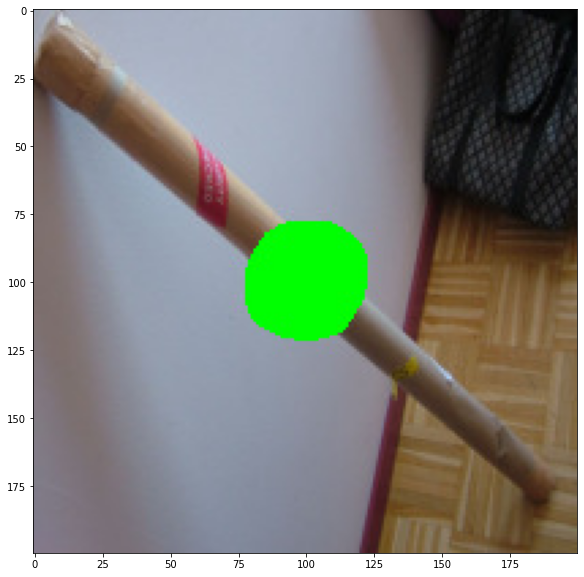

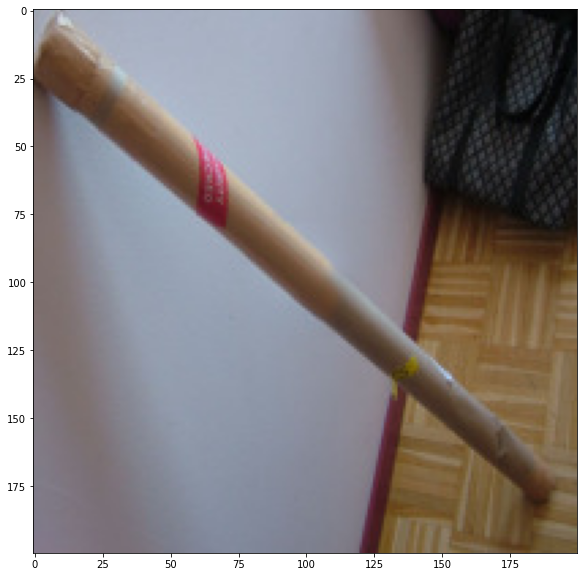

In [2]:
image=cv2.imread("../images/stick.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(10, 10))
plt.imshow(image)
ori=cv2.imread("../images/ori.png")
ori = cv2.cvtColor(ori, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(10, 10))
plt.imshow(ori)
psize = 5

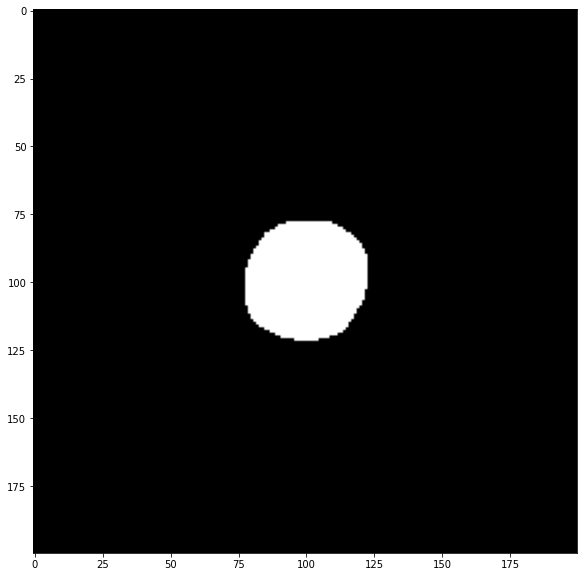

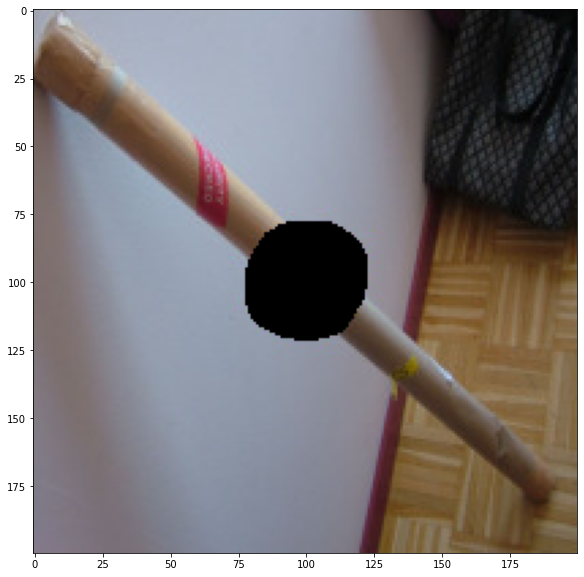

In [3]:
m,n,_=image.shape
H=[]
Hbinary=np.zeros((m,n),dtype='uint8')
for i in range(m):
    for j in range(n):
        if image[i,j,1]>240:
            image[i,j] = [0,0,0]
            H.append([i,j])
            Hbinary[i,j]=1
H=np.array(H,dtype=int)
fig = plt.figure(figsize=(10, 10))
plt.imshow(Hbinary,'gray')

fig = plt.figure(figsize=(10, 10))
plt.imshow(image)

In [4]:
Images,Hvalues, binaries = imagePyramidOcclusionPyramid(np.copy(ori), Hbinary, psize)
textures=TextureFeaturePyramid(np.copy(ori), Hbinary, psize)

2


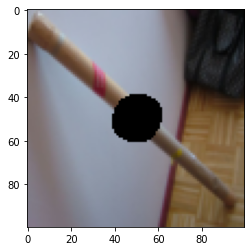

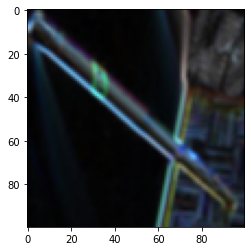

In [6]:
print(len(Images))
plt.imshow(Images[1])
plt.show()
plt.imshow(textures[1])


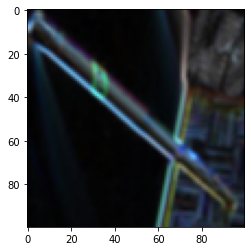

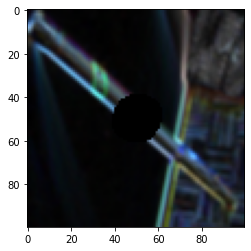

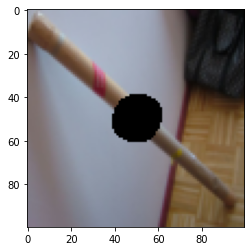

In [7]:
inp = np.copy(Images[1])
plt.imshow(textures[1])
plt.show()
tt = np.copy(textures[1])
for i in range(textures[1].shape[0]):
    for j in range(textures[1].shape[1]):
        for k in range(textures[1].shape[2]):
            if binaries[1][i,j] == 1:
                tt[i,j] = [0,0,0]
plt.imshow(tt)
plt.show()
plt.imshow(inp)
                

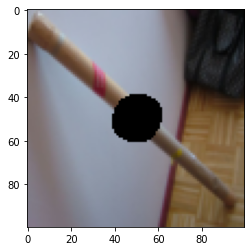

86


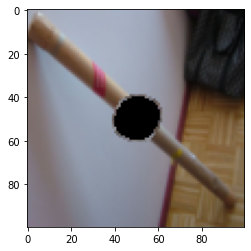

78


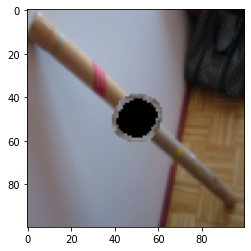

70


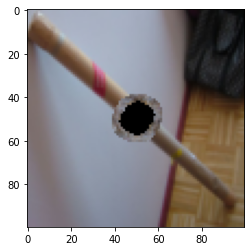

60


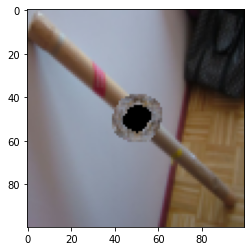

47


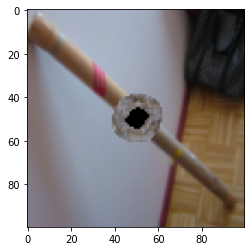

38


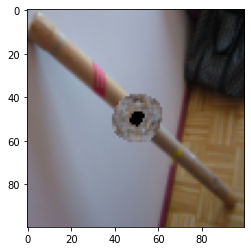

23


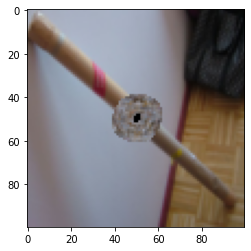

10


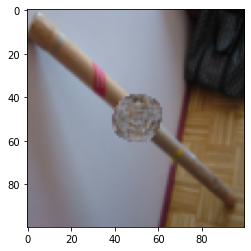

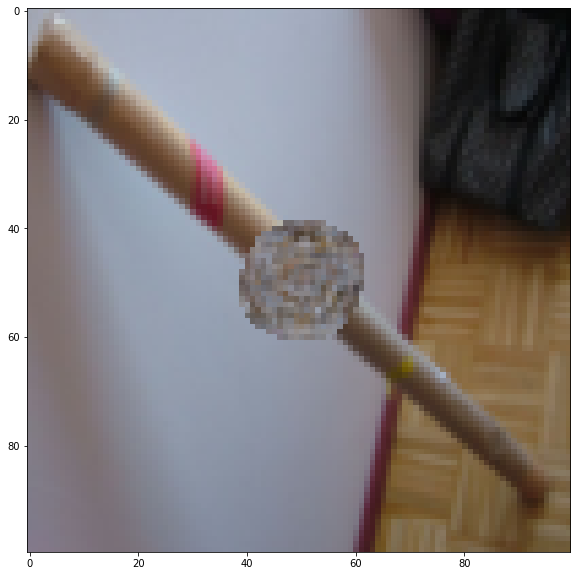

In [8]:
plt.imshow(inp)
plt.show()
img,T=OnionPeel(inp, tt, Hvalues[1], psize,50)
fig = plt.figure(figsize=(10, 10))
plt.imshow(img)

In [ ]:
# fig = plt.figure(figsize=(10, 10))
plt.imshow(img)

In [ ]:
plt.imshow(inp)
plt.show()
plt.imshow(binaries[2], 'gray')
plt.show()

for i in range(inp.shape[0]):
    for j in range(inp.shape[1]):
        if binaries[2][i,j] == 1:
            inp[i,j] = [255,255,255]
fig = plt.figure(figsize=(10, 10))        
plt.imshow(inp)
plt.show()

In [ ]:
# m,n,_=img.shape
# H=[]
# for i in range(m):
#     for j in range(n):
#         if img[i,j,1]>240:
#             H.append([i,j])
#             img[i,j]=[0,0,0]
# H=np.array(H,dtype=int)
# fig = plt.figure(figsize=(10, 10))
# plt.imshow(img)